# Social Doors Group Level Analyses

In [1]:
import os
import glob
import pandas as pd

from nltools.stats import zscore, regress, find_spikes
from nltools.data import Brain_Data, Design_Matrix
from nilearn.plotting import view_img, glass_brain, plot_stat_map

import matplotlib.pyplot as plt

### Set paths and set subjects

In [58]:
bids_dir = '/data/projects/social_doors/'


os.chdir(bids_dir)

data_dir = os.path.join(bids_dir, 'derivatives','social_doors-nilearn')

# Define subject list
#subjs_scan_info = pd.read_csv(bids_dir+'/derivatives/mriqc/mriqc_summary_poor.csv')
#subjs_list = list(subjs_scan_info['subject'].unique())
#subjs_list.sort()
subjs_list = pd.read_csv(bids_dir+'derivatives/participants_good.tsv', sep='\t')
subjs_list_kids = subjs_list[subjs_list['group']=='kid']['participant_id'].to_list()
subjs_list_colg = subjs_list[subjs_list['group']=='college']['participant_id'].to_list()

print('Found '+str(len(subjs_list_kids))+' adolescent subjects')
print('Found '+str(len(subjs_list_colg))+' college subjects')



Found 32 adolescent subjects
Found 31 college subjects


# Group Analysis
Perform a one sample t-test and multiple comparisons correction

In [63]:
# Define mask
#subj_mni_mask = bids_dir+"derivatives/reliability_analysis/relscenarios/Anatomy/sub-301_space-MNI152NLin2009cAsym_label-GM_probseg_bin.nii.gz"
#subj_mni_mask = bids_dir+'derivatives/fmriprep/sub-011/anat/sub-011_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
subj_mni_mask = bids_dir+"derivatives/fmriprep/sub-010/anat/sub-010_space-MNI152NLin2009cAsym_label-GM_probseg_bin.nii.gz"

# Define contrasts
#contrasts = ['facesVoutcm', 'all_winVlos', 'positive_winVlos']
contrasts = ['valence_x_outcome']
tasks = ['mdoors', 'social']
groups = ['kids', 'colg']

# Define dictionary to store stats
univ_stats_all = {}

for group in groups:
    if group == 'kids':
        temp_subj_list = subjs_list_kids
    elif group == 'colg':
        temp_subj_list = subjs_list_colg
        
    for task in tasks:
        for contrast in contrasts:
            print('Calculating '+group+' '+task+' '+contrast+' contrast')
            
            # Find subject tmaps for a given contrast
            temp_file_list = []
            for subj in temp_subj_list:
                temp_file = glob.glob(os.path.join(data_dir, subj, 'zmap_'+task+'_'+contrast+'.nii.gz'))
                temp_file_list = temp_file_list + temp_file

            temp_file_list.sort()
            

            # Load data
            temp_univ = Brain_Data(temp_file_list, mask=subj_mni_mask)
            
            #temp_univ_sm = temp_univ.smooth(fwhm=6)

            # Perform FDR multiple comparisons correction
            univ_stats_all[group+'_'+task+'_'+contrast] = temp_univ.ttest(threshold_dict={'fdr':.05})

            # Export as nifti
            univ_stats_all[group+'_'+task+'_'+contrast]['t'].write(os.path.join(data_dir,'group','tmap_'+group+'_'+task+'_'+contrast+'_unc.nii.gz'))
            univ_stats_all[group+'_'+task+'_'+contrast]['thr_t'].write(os.path.join(data_dir,'group','tmap_'+group+'_'+task+'_'+contrast+'_fdr05.nii.gz'))


Calculating kids mdoors valence_x_outcome contrast
Calculating kids social valence_x_outcome contrast
Calculating colg mdoors valence_x_outcome contrast
Calculating colg social valence_x_outcome contrast


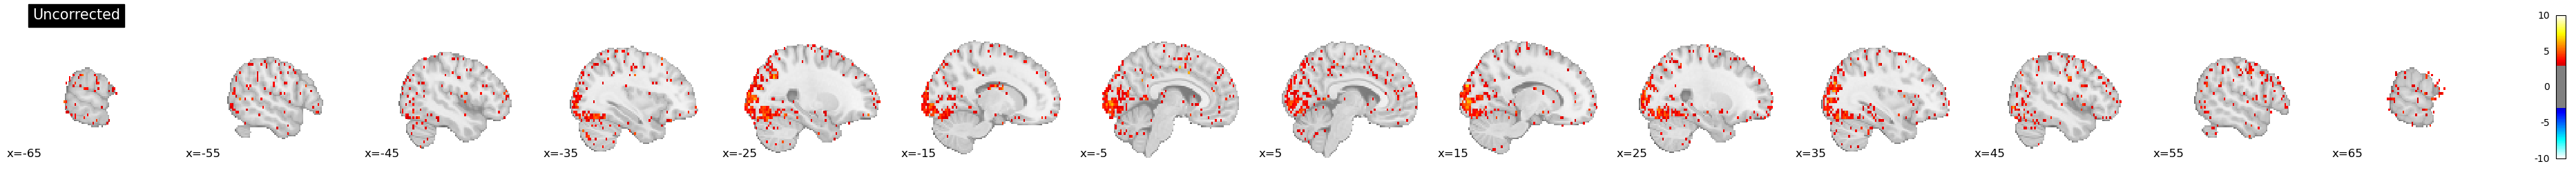

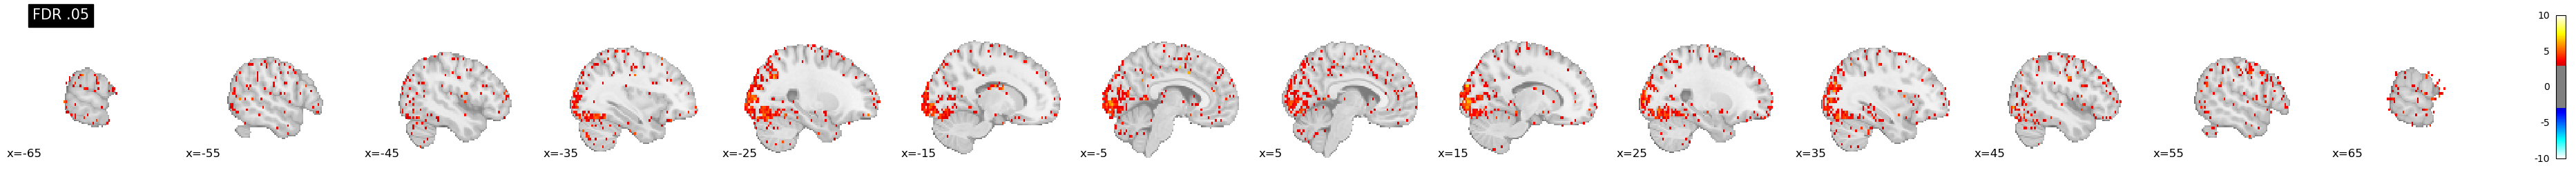

In [66]:
plot_stat_map(univ_stats_all['kids_mdoors_valence_x_outcome']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['kids_mdoors_valence_x_outcome']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')

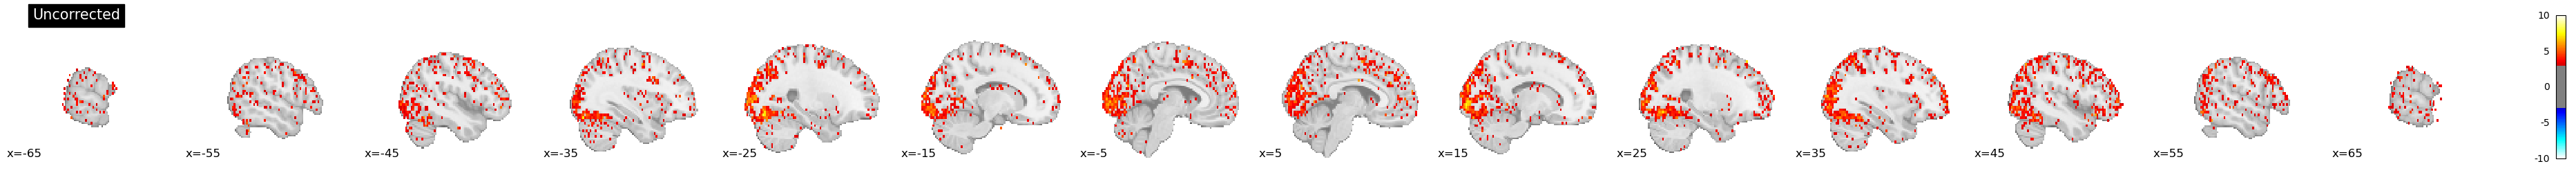

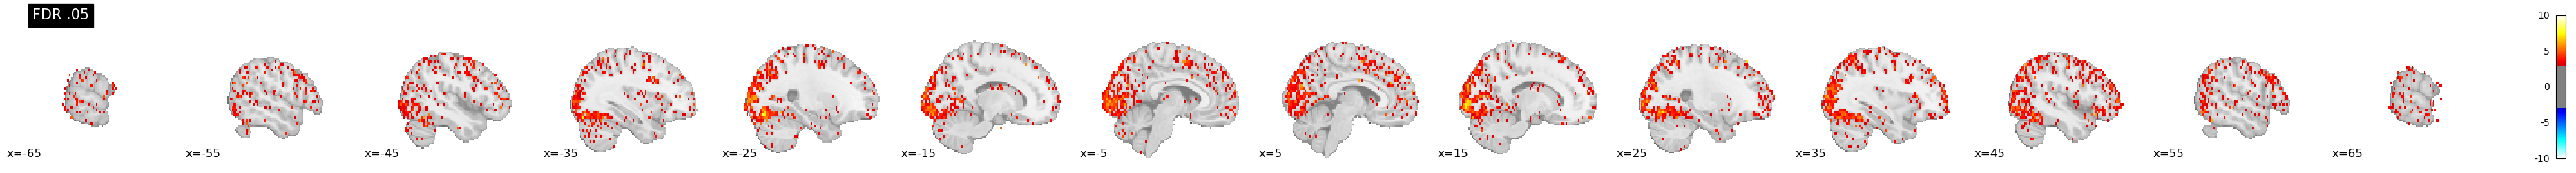

In [68]:
plot_stat_map(univ_stats_all['kids_social_valence_x_outcome']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['kids_social_valence_x_outcome']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')

# Faces vs Doors

In [41]:
contrast = 'facesVdoors'

for group in groups:
    if group == 'kids':
        temp_subj_list = subjs_list_kids
    elif group == 'colg':
        temp_subj_list = subjs_list_colg
    
            
    # Find subject tmaps for a given contrast
    temp_file_list = []
    for subj in temp_subj_list:
        temp_file = glob.glob(os.path.join(data_dir, subj, 'tmap_'+contrast+'.nii.gz'))
        temp_file_list = temp_file_list + temp_file

    temp_file_list.sort()
            

    # Load data
    temp_univ = Brain_Data(temp_file_list, mask=subj_mni_mask)

    # Perform FDR multiple comparisons correction
    univ_stats_all[group+'_'+contrast] = temp_univ.ttest(threshold_dict={'fdr':.05})

    # Export as nifti
    univ_stats_all[group+'_'+contrast]['t'].write(os.path.join(data_dir,'group','tmap_'+group+'_'+contrast+'_unc.nii.gz'))
    univ_stats_all[group+'_'+contrast]['thr_t'].write(os.path.join(data_dir,'group','tmap_'+group+'_'+contrast+'_fdr05.nii.gz'))


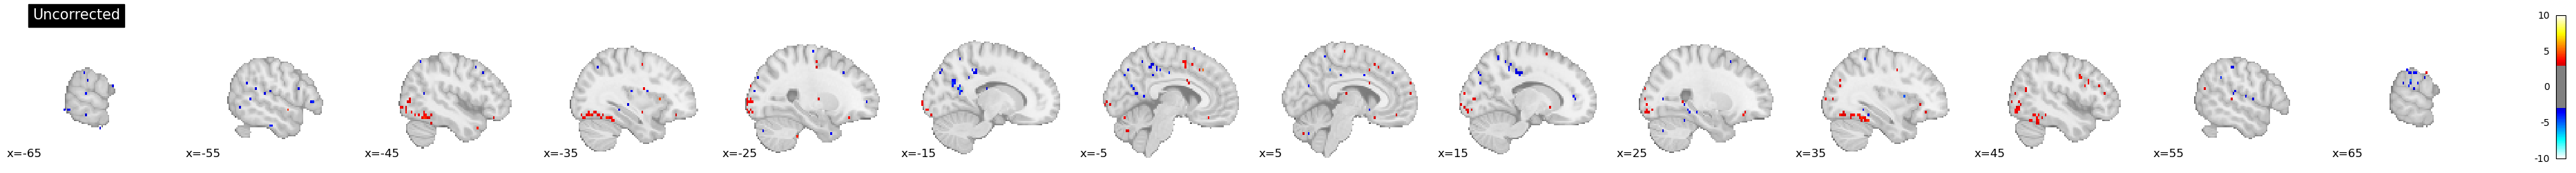

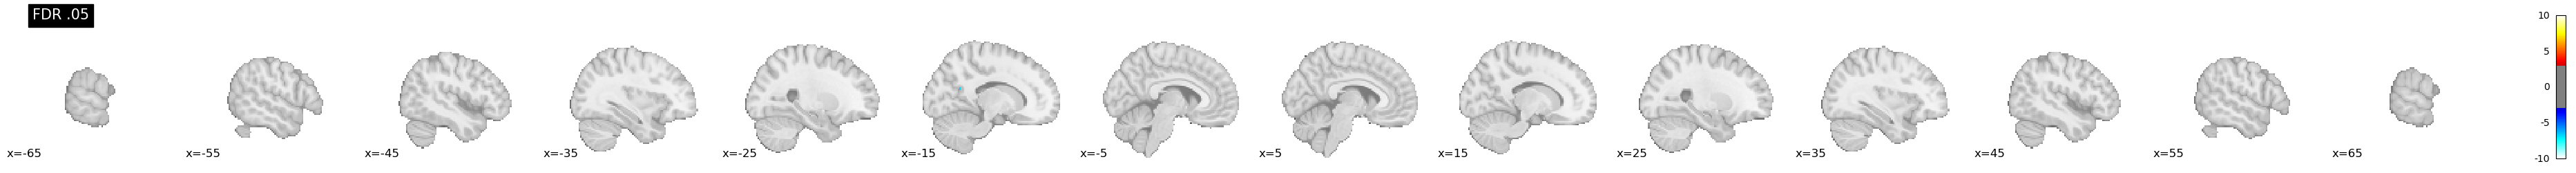

In [43]:
plot_stat_map(univ_stats_all['kids_facesVdoors']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['kids_facesVdoors']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

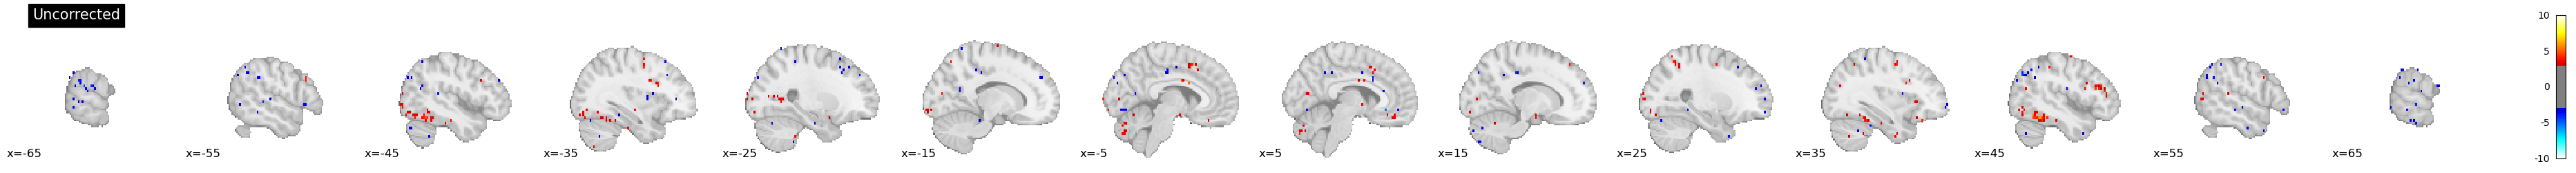

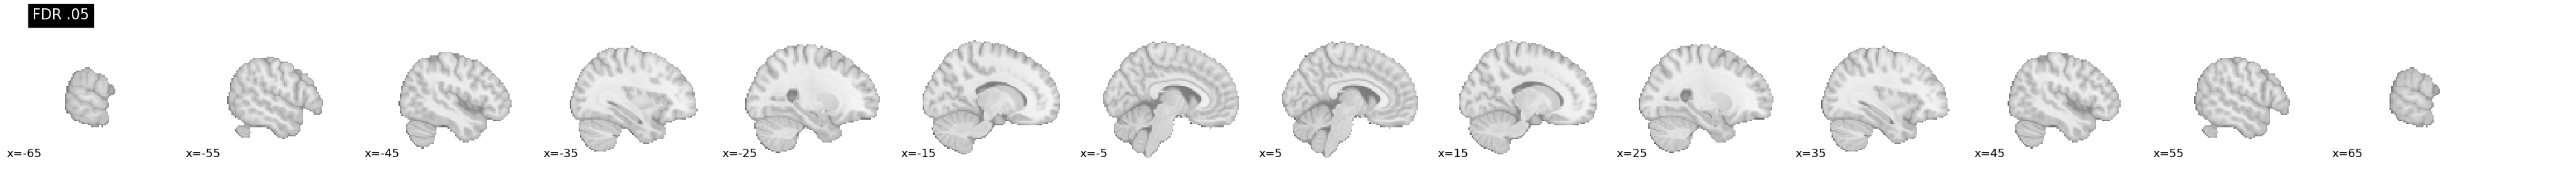

In [44]:
plot_stat_map(univ_stats_all['colg_facesVdoors']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['colg_facesVdoors']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

# Decision vs Outcome

## Monetary

/opt/anaconda3/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


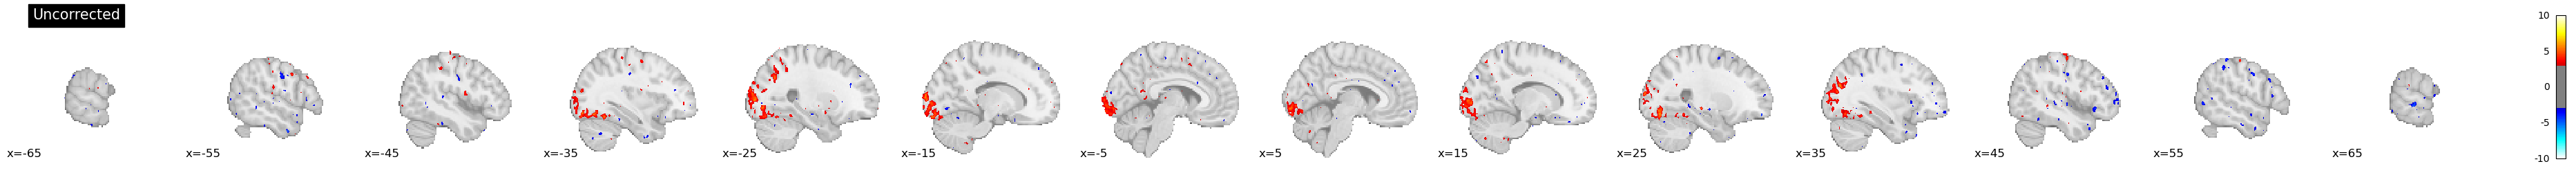

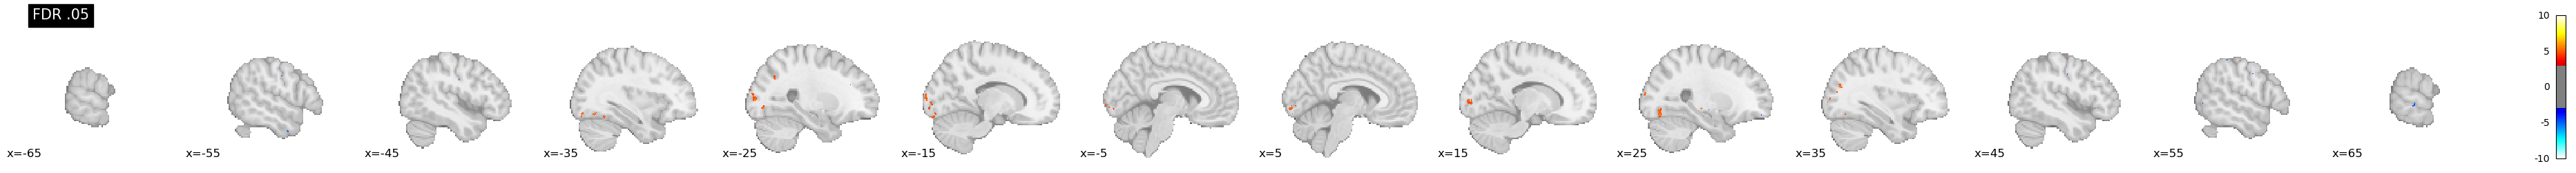

In [4]:
plot_stat_map(univ_stats_all['kids_mdoors_facesVoutcm']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['kids_mdoors_facesVoutcm']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

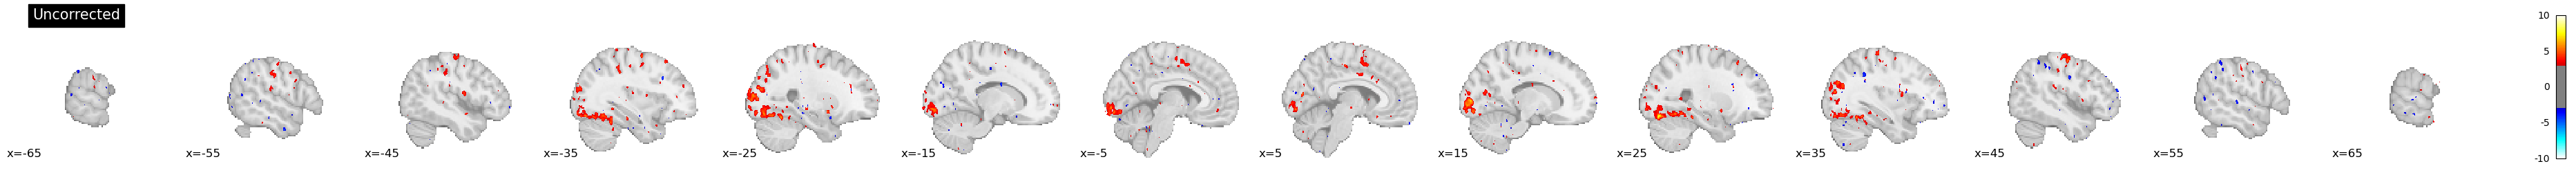

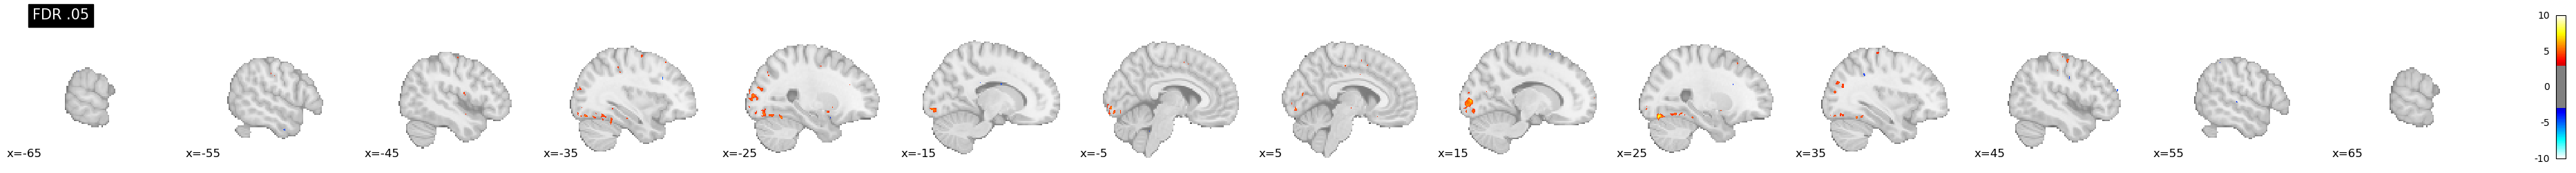

In [5]:
plot_stat_map(univ_stats_all['colg_mdoors_facesVoutcm']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['colg_mdoors_facesVoutcm']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

## Social

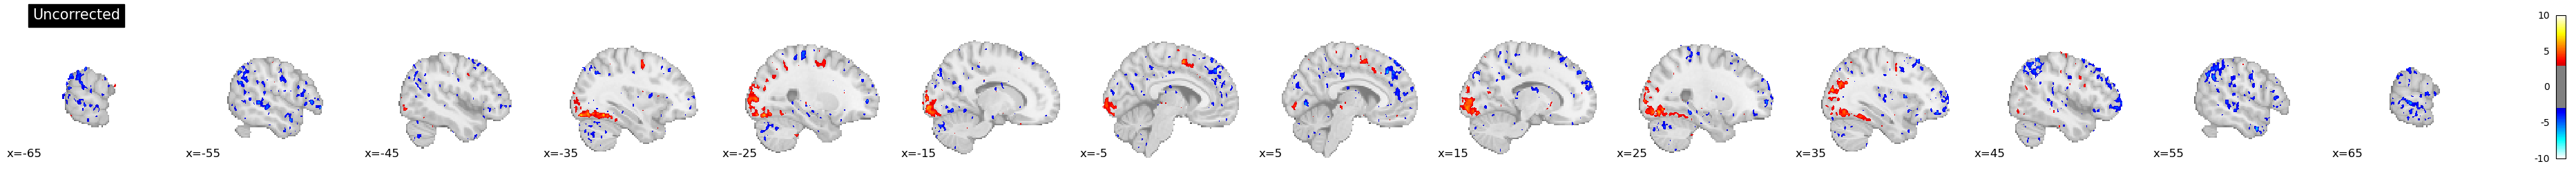

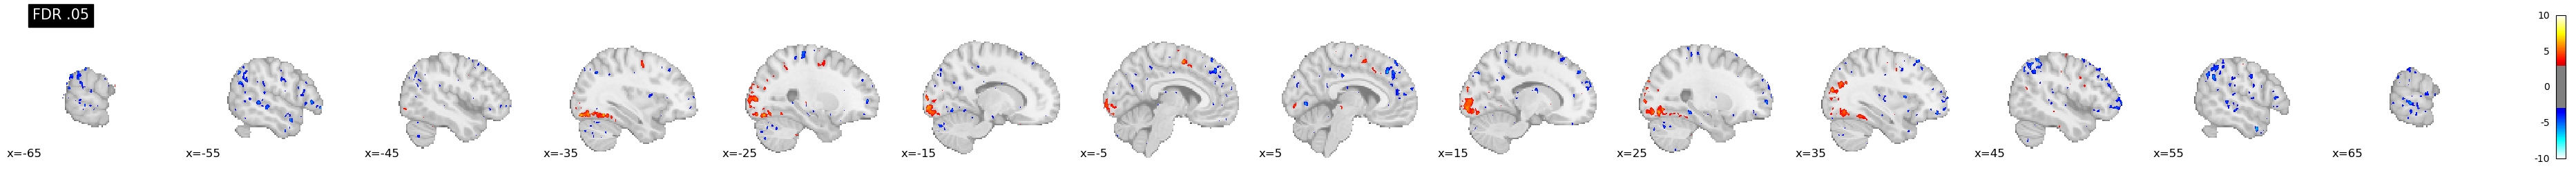

In [6]:
plot_stat_map(univ_stats_all['kids_social_facesVoutcm']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['kids_social_facesVoutcm']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

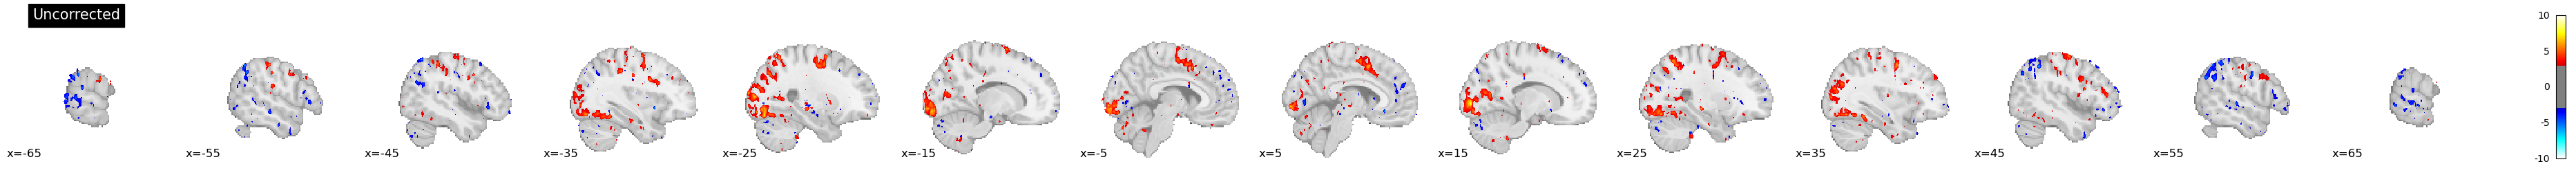

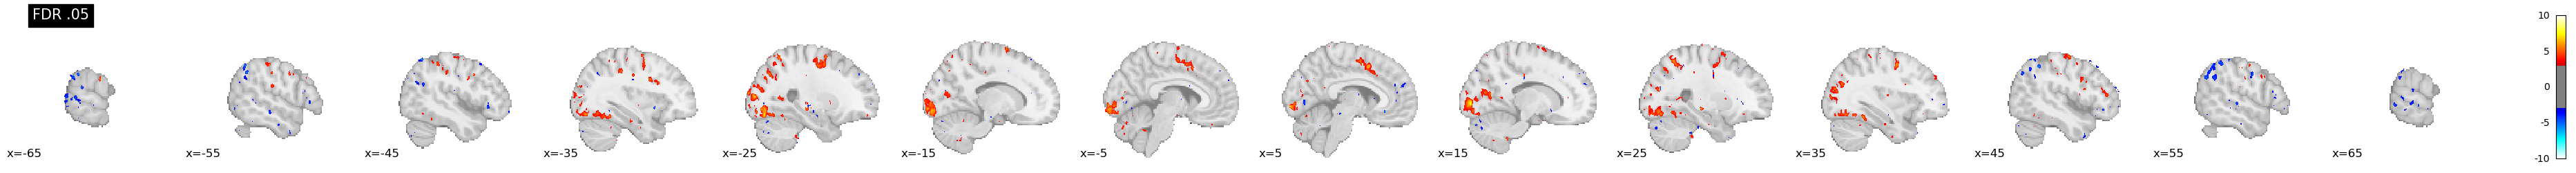

In [7]:
plot_stat_map(univ_stats_all['colg_social_facesVoutcm']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['colg_social_facesVoutcm']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

# Correct Vs Incorrect

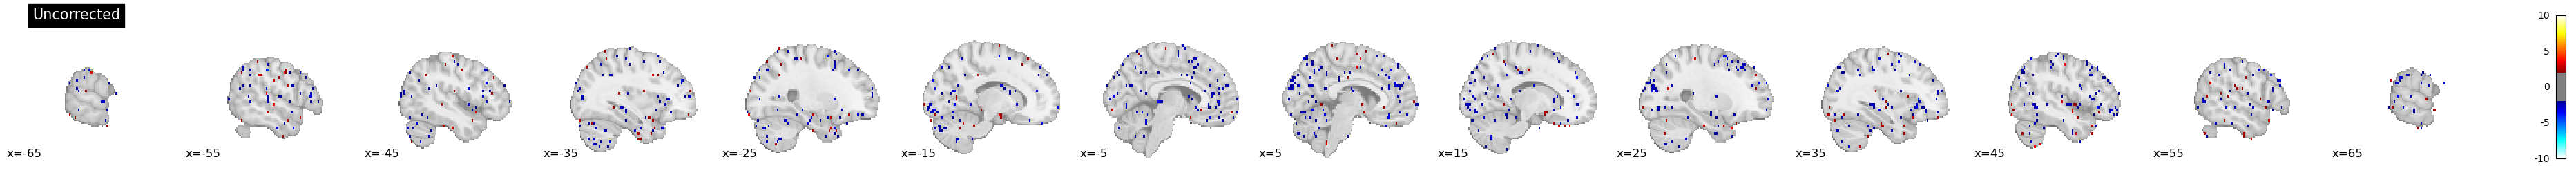

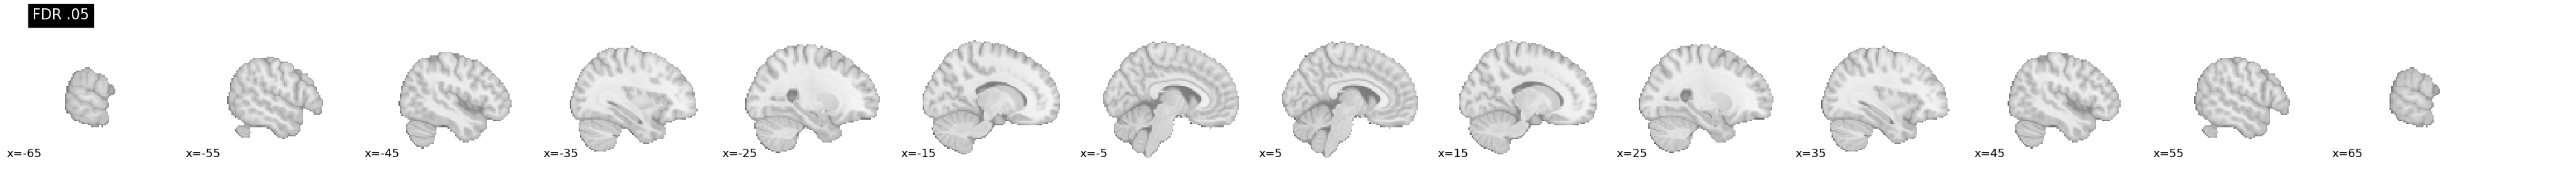

In [51]:
plot_stat_map(univ_stats_all['kids_mdoors_all_winVlos']['t'].to_nifti(), threshold=2,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['kids_mdoors_all_winVlos']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

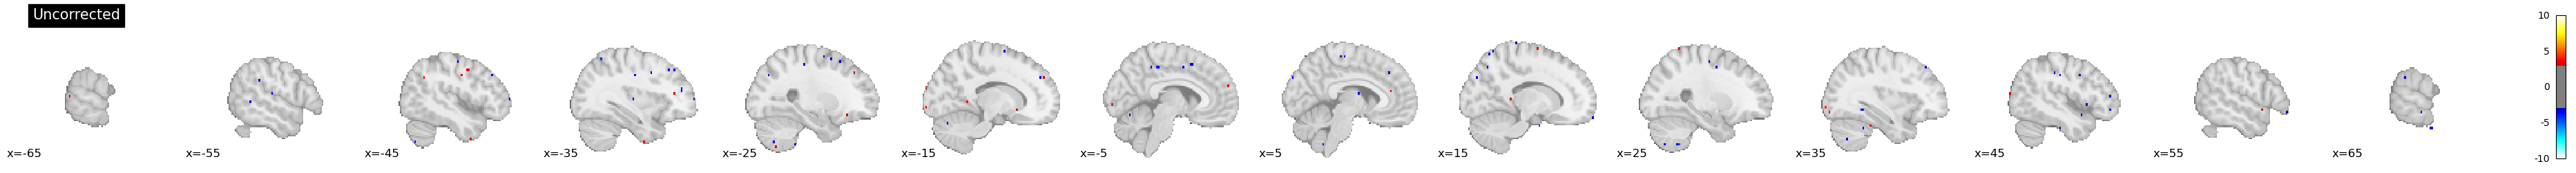

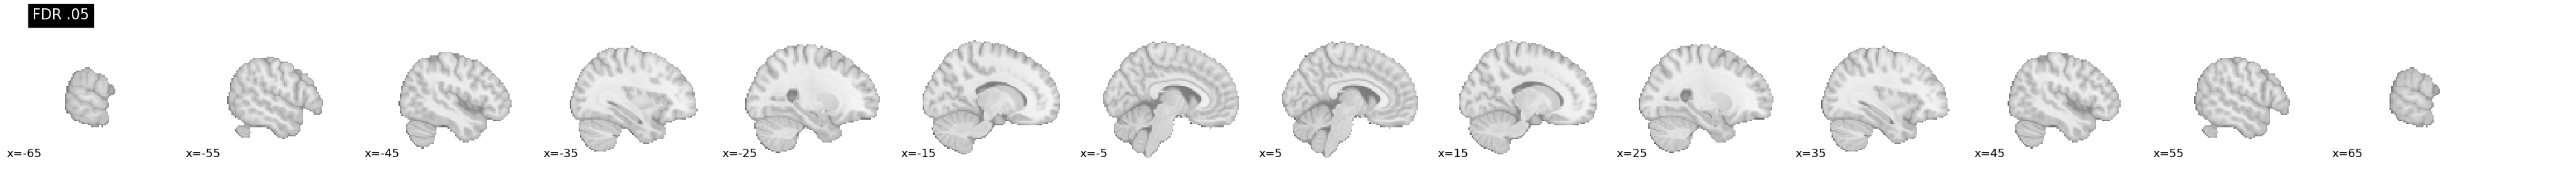

In [52]:
plot_stat_map(univ_stats_all['colg_mdoors_all_winVlos']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['colg_mdoors_all_winVlos']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

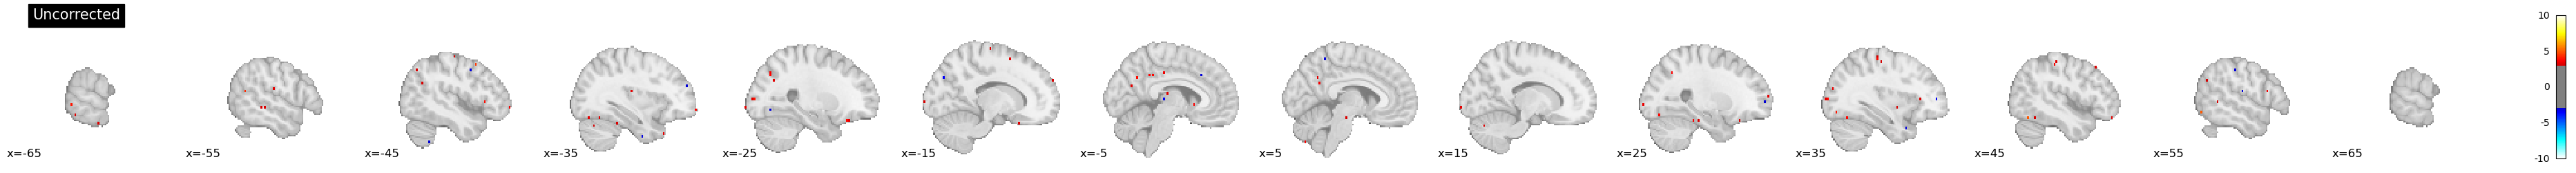

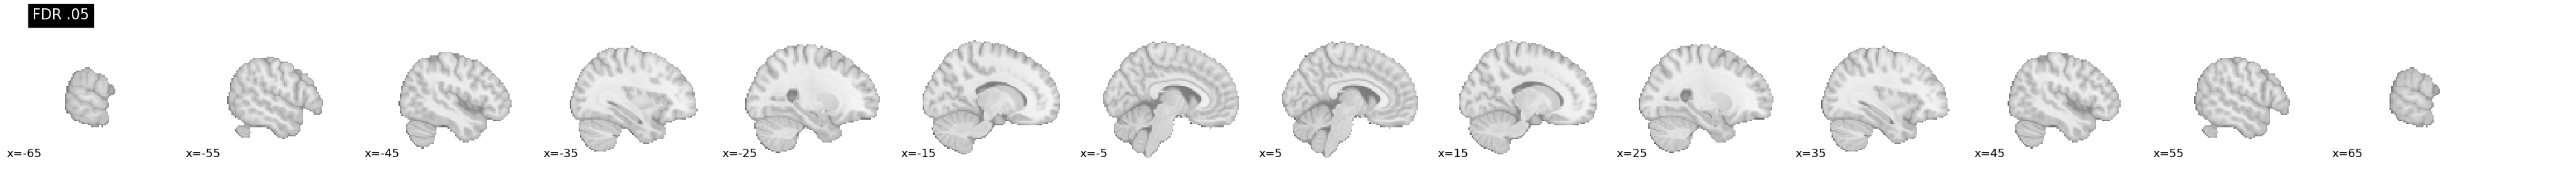

In [53]:
plot_stat_map(univ_stats_all['kids_social_all_winVlos']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['kids_social_all_winVlos']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

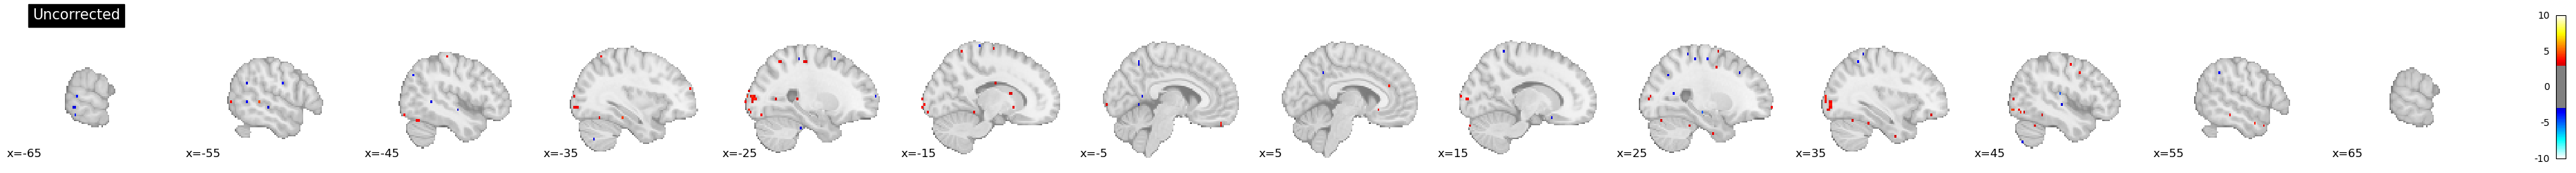

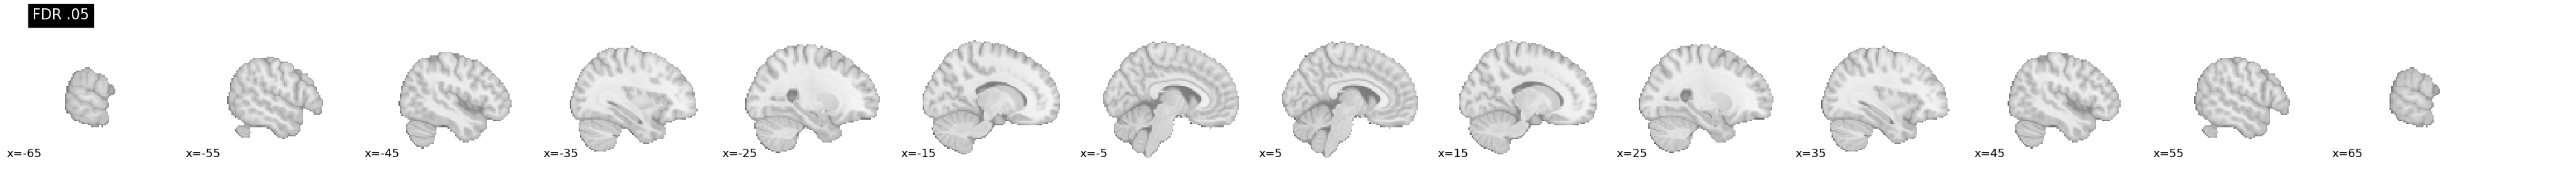

In [54]:
plot_stat_map(univ_stats_all['colg_social_all_winVlos']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['colg_social_all_winVlos']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

# Positive - Correct vs Incorrect

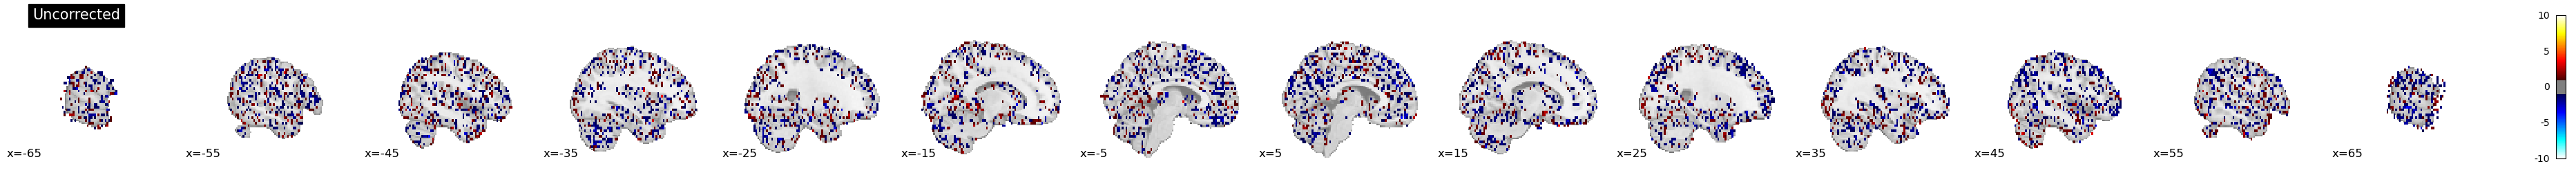

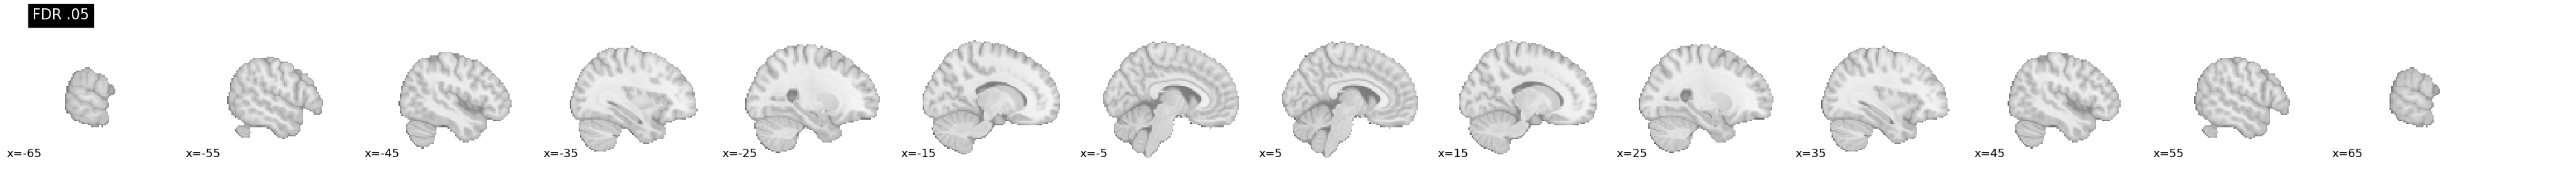

In [56]:
plot_stat_map(univ_stats_all['kids_mdoors_positive_winVlos']['t'].to_nifti(), threshold=1,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['kids_mdoors_positive_winVlos']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

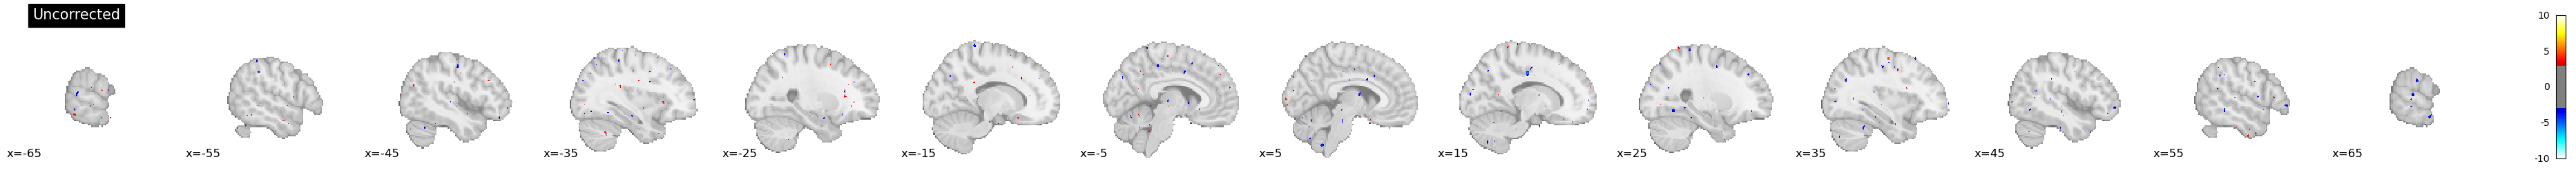

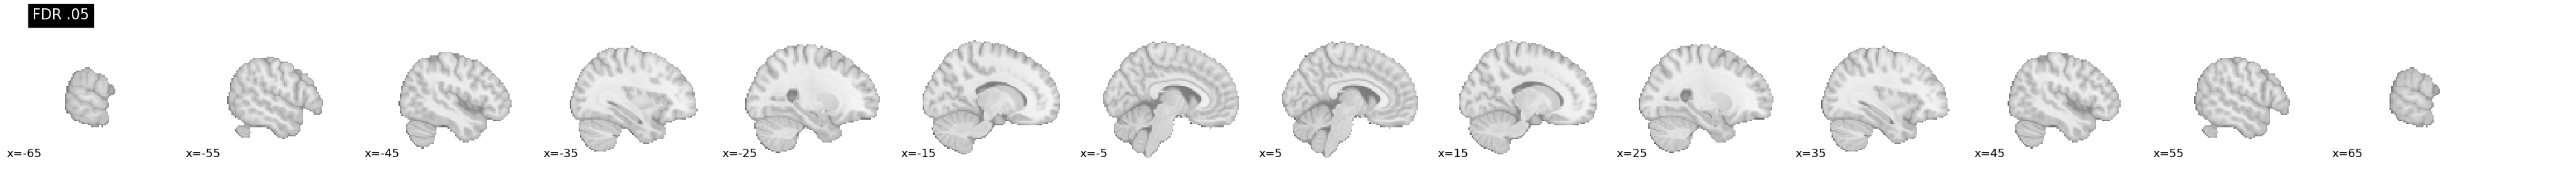

In [13]:
plot_stat_map(univ_stats_all['colg_mdoors_positive_winVlos']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['colg_mdoors_positive_winVlos']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

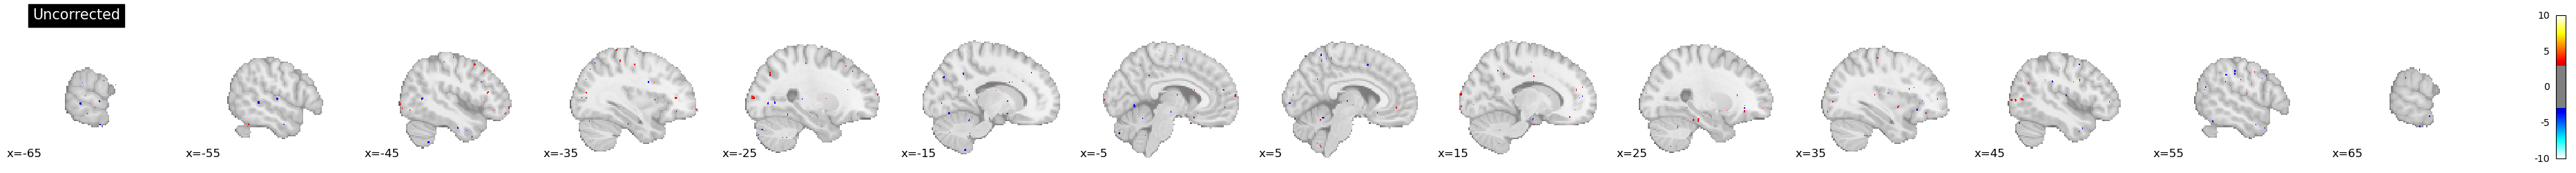

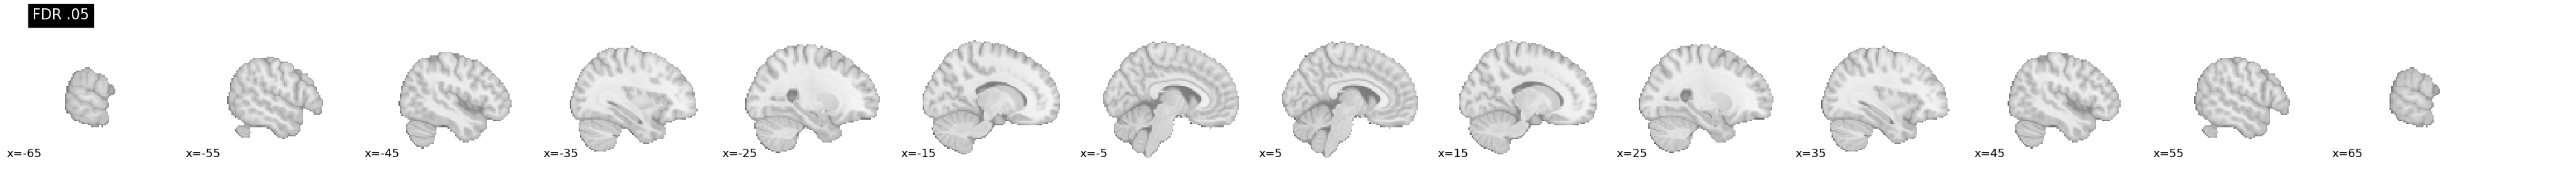

In [14]:
plot_stat_map(univ_stats_all['kids_social_positive_winVlos']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['kids_social_positive_winVlos']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')

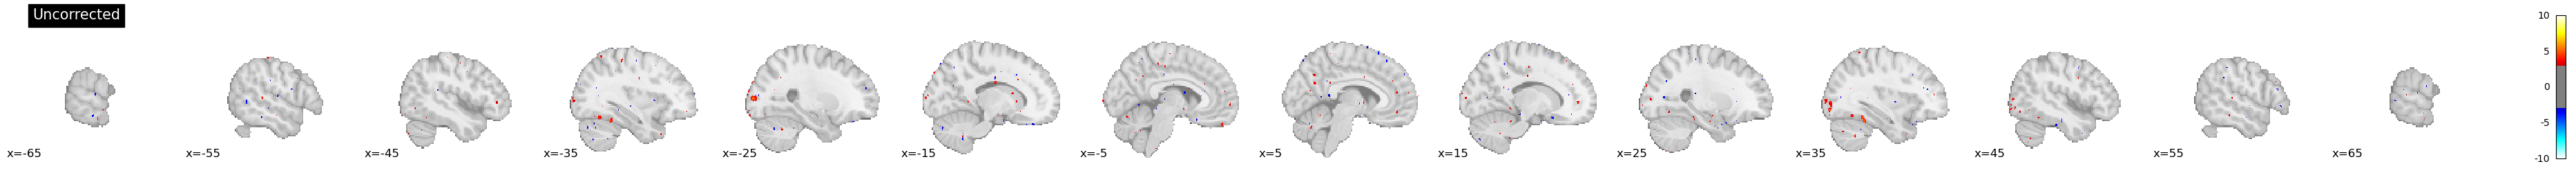

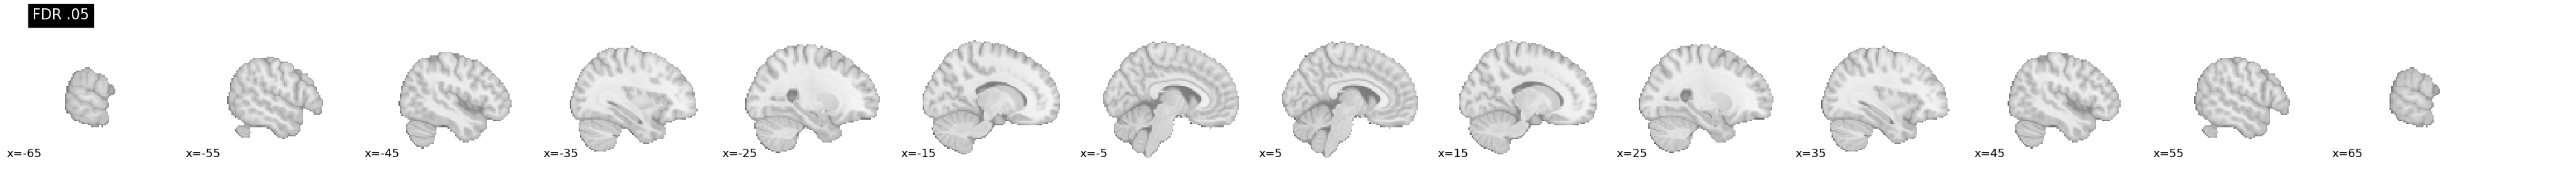

In [15]:
plot_stat_map(univ_stats_all['colg_social_positive_winVlos']['t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='Uncorrected')
#plt.savefig(data_dir+'/group/tmap_facesVoutcm_unc.png')

plot_stat_map(univ_stats_all['colg_social_positive_winVlos']['thr_t'].to_nifti(), threshold=3,
    cut_coords=range(-65, 66, 10), display_mode='x', vmax=10, colorbar=True,
    title='FDR .05')
#plt.savefig(data_dir+'/group/tmap_faces_outcm_fdr05.png')